# Color Maps

This short tutorial will show you how to change the color maps of loaded pictures. A colormap is defined by  a m-by-3 matrix of real numbers between 0.0 and 1.0. Each row is an RGB vector that defines one color.

This follows the story of kutsushita, the cat that likes to change color.

In [12]:
; first we import the usual namespaces.
(ns affectionate-thorns
  (:require
    [opencv4.utils :as u]
    [opencv4.colors.rgb :as color]
    [opencv4.core :refer :all]))

nil

Changing color space for a default color space is done through the function **apply-color-map!** from opencv4.core 

The mat as well as the colormap id is passed as parameter.

Using the chaining method we can apply the *BONE* color map using the code below:

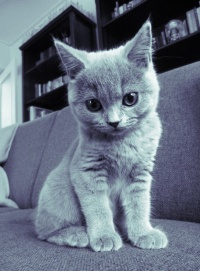

In [13]:
(-> "resources/images/cats/onsofa.jpg" 
  imread  
  (u/resize-by 0.5)
  (apply-color-map! COLORMAP_BONE )
  (u/>>>))

You just saw one colormap, but a few other default color maps are available by default. The array below is a list of all the available color maps through OpenCV core. 

In [14]:
(def colors-maps
[
 "COLORMAP_HOT"
 "COLORMAP_HSV"
 "COLORMAP_JET"
 "COLORMAP_BONE"
 "COLORMAP_COOL"
 "COLORMAP_PINK"
 "COLORMAP_RAINBOW"
 "COLORMAP_OCEAN"
 "COLORMAP_WINTER"
 "COLORMAP_SUMMER"
 "COLORMAP_AUTUMN"
 "COLORMAP_SPRING"])

#'affectionate-thorns/colors-maps

In [15]:
(defn watermark [ source text]
  (put-text! source
    text
    (new-point 30 30) FONT_HERSHEY_PLAIN 1 (new-scalar 255 255 255) 2))

(defn change-color [ source color-map-string ]
  (->
  source
  clone
  (apply-color-map! (eval (read-string (str "opencv4.core/" color-map-string))))
  (watermark color-map-string)))

(defn apply-all-colormaps [ source ] 
   (cons
    (-> source clone (watermark "ORIGINAL"))
    (map (partial change-color source) colors-maps)) )

#'affectionate-thorns/apply-all-colormaps

In [16]:

(def source 
  (-> "http://sites.psu.edu/siowfa15/wp-content/uploads/sites/29639/2015/10/cat.jpg"
    (u/mat-from-url)
    (u/resize-by 0.1)))

#'affectionate-thorns/source

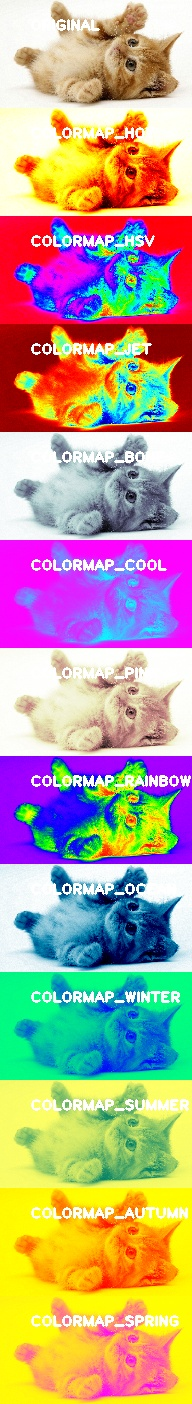

In [17]:
(def targets (apply-all-colormaps source))
(u/>>> (vconcat! targets))

Defining your own color space is also possible using the function **transform!**. transform needs a matrix doing the mapping from rgb to some mapping. 
The first line of the matrix is the blue value, the second line is the green value, the third value is the red value. 

The below matrix makes so that all red pixels are turned to green. 

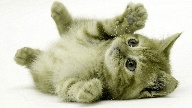

In [34]:
(def custom (u/matrix-to-mat [
  [1 0 0] ; blue
  [0 1 0] ; green 
  [0 1 0] ; red
  ]))

(-> source
  clone
  (transform!  custom)
  (u/>>> ))

You could use the same technique to define your own sepia filter.

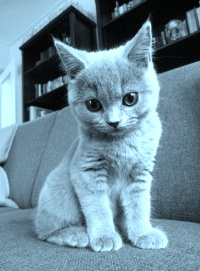

In [35]:
(def img (-> "resources/images/cats/onsofa.jpg" imread (u/resize-by 0.5)))

(def blue-sepia (u/matrix-to-mat [
  [0.393 0.769 0.189] ; blue
  [0.349 0.686 0.168] ; green
  [0.272 0.534 0.131] ; red
  ]))

(-> img
  clone
  (transform!  blue-sepia)
  (u/>>> ))

And a regular sepia is done using a similar matrix.

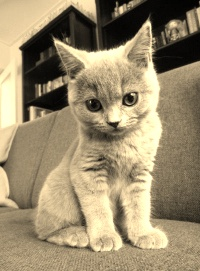

In [36]:
(def sepia-2 (u/matrix-to-mat [
  [0.131 0.534 0.272]
  [0.168 0.686 0.349]
  [0.189 0.769 0.393]
  ]))

(-> img
  clone
  (transform!  sepia-2)
  (u/>>> ))